In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
from AdvancedLaneDetection.LaneModelling import *
%matplotlib inline

(240, 640, 3)


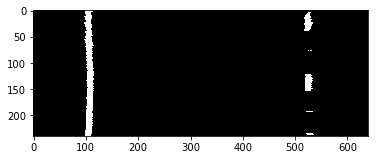

In [32]:
img = cv2.imread('test_images/output/straight_lines1.png')
img = img[0:240, 640:, :]
print(img.shape)
#create binary image
img[(img < 127)]=0
img[(img >= 127)]=255
plt.imshow(img)

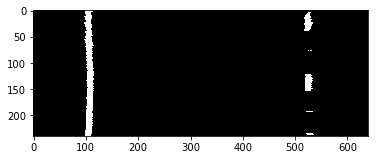

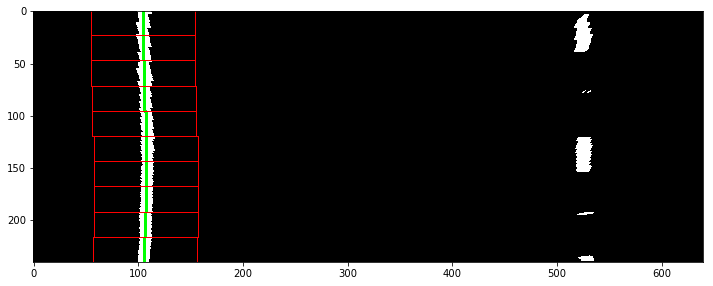

In [33]:
bin_img = img[:,:,0]
plt.imshow(bin_img, cmap="gray")
plt.show()
out_image, lane = detectLanes(img[:,:,0], 100, 24, 50, num_white = (24*50)//8)
plt.figure(figsize=(12,12))
plt.imshow(out_image, cmap="gray")

In [35]:
out_img, lane_eq = fitLine(img, lane, degree=2)
plt.figure(figsize=(12,12))
plt.imshow(out_img)

IndexError: index 2 is out of bounds for axis 0 with size 2

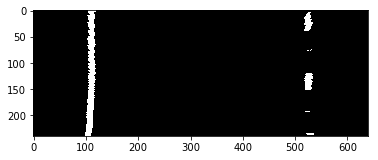

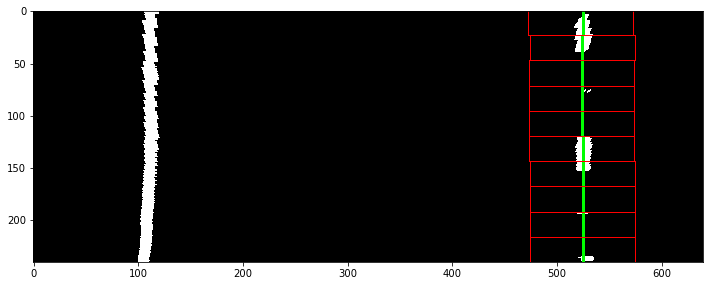

In [13]:
bin_img = img[:,:,0]
plt.imshow(bin_img, cmap="gray")
plt.show()
out_image, lane = detectLanes(img[:,:,0], 100, 24, 50, num_white = (24*50)//8, side='right')
plt.figure(figsize=(12,12))
plt.imshow(out_image, cmap="gray")

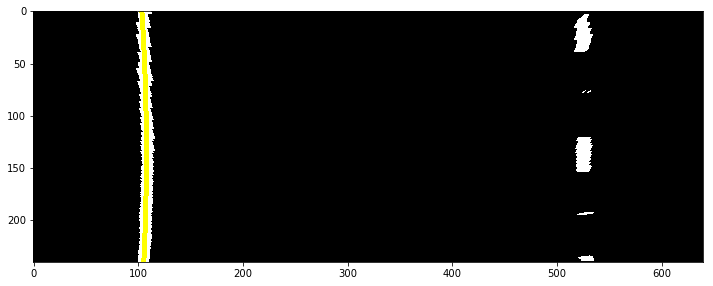

In [26]:
out_img, lane_eq = fitLine(img, lane, degree=2)
plt.figure(figsize=(12,12))
plt.imshow(out_img)